In [1]:
# import tweepy
# import csv #Import csv
# auth = tweepy.auth.OAuthHandler('PvAvpX53z182ur75NXmiluukm', 'Lkd5NHqEX3mqt97jniRMWA9diQkPF3v18YWrDudZeg11ulGsnL')
# auth.set_access_token('1333764714841612290-tvEVqkCxcgFYSsyPjPqiWc8K4fsvsm', 'ykRra0mRQcpwkW0SfE10Mcnkq4UjiyqoCfvxNc16UZs0R')

# api = tweepy.API(auth,wait_on_rate_limit=True)

# # Open/create a file to append data to
# csvFile = open('dataset.csv', 'a',encoding="utf-8",newline='')

# #Use csv writer
# csvWriter = csv.writer(csvFile)

# for tweet in tweepy.Cursor(api.search,count=100000,
#                            q = "PlayStation",
#                            tweet_mode='extended',
#                            lang = "en").items():

#     # Write a row to the CSV file. I use encode UTF-8
#     csvWriter.writerow([tweet.full_text,tweet.user.screen_name,tweet.user.location])
#     print(tweet.full_text,tweet.user.screen_name,tweet.user.location)
# csvFile.close()

In [2]:
# Get the dataset 

(1600000, 2)


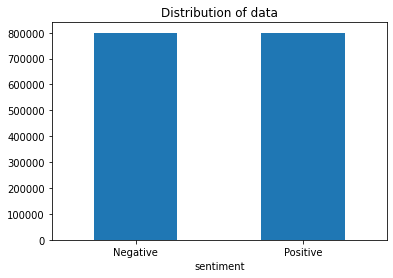

In [3]:
# Importing the dataset
import pandas as pd
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('CSV/training.1600000.processed.noemoticon.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

# Storing data in lists.
text, sentiment = list(dataset['text']), list(dataset['sentiment'])
print(dataset.shape)

In [4]:
dataset.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
dataset.tail()

,sentiment,text
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,happy #charitytuesday @theNSPCC @SparksCharity...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   text       1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [7]:
dataset = dataset.sample(frac=1).reset_index(drop=True)           #resetting index
dataset['len']=dataset["text"].str.len()                          #removing clipped tweets
df1= dataset[(dataset['len'] <=137)]
df2=dataset[(dataset['len'] >=150)]
dataset=pd.concat([df1,df2])                              
dataset = dataset.sample(frac=1).reset_index(drop=True)       #resetting index

In [8]:
dataset.shape

(1549911, 3)

In [9]:
dataset.head()

,sentiment,text,len
0,0,Is really concerned about my pops,34
1,0,@cianshortt haha sat in the corner with me hea...,81
2,4,@rehna_tu thanks..,19
3,0,@msengupta I was just noticing the same thing....,109
4,0,Things don't always be perfect .,33


In [10]:
# convert text into lowercase

In [11]:
dataset['text'] = dataset['text'].str.lower()

print(dataset)

         sentiment                                               text  len
0                0                 is really concerned about my pops    34
1                0  @cianshortt haha sat in the corner with me hea...   81
2                4                                @rehna_tu thanks..    19
3                0  @msengupta i was just noticing the same thing....  109
4                0                  things don't always be perfect .    33
...            ...                                                ...  ...
1549906          4  we are playing dominos.   http://twitpic.com/6...   50
1549907          0  http://twitpic.com/4wt50 - thought it would cl...   62
1549908          0              carless in the pouring rain...   (oa)   37
1549909          4  sä?ku sekot @greekshow , å¡obrä«d mans top ser...   52
1549910          0  rip farrah fawcett... that breaks my heart  i ...  103

[1549911 rows x 3 columns]


In [12]:
dataset.head()

,sentiment,text,len
0,0,is really concerned about my pops,34
1,0,@cianshortt haha sat in the corner with me hea...,81
2,4,@rehna_tu thanks..,19
3,0,@msengupta i was just noticing the same thing....,109
4,0,things don't always be perfect .,33


In [13]:
# cleaning the dataset

In [14]:
import numpy as np
import re
def remove_pattern(input_txt, pattern):                                           #function to remove pattern 
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    dataset['text'] = dataset['text'].str.lower()
    lst = np.vectorize(remove_pattern)(lst, "\r")                                  
    lst = np.vectorize(remove_pattern)(lst, "\n")
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")                         # removing RT @x from tweets:
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")                             # removing  @xxx from tweets 
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")            # reremoving URL links http://xxx
    return lst

In [15]:
dataset['clean']= clean_tweets(dataset['text'])   #filtered texts kept in a new colum as clean

In [16]:
dataset.head()

,sentiment,text,len,clean
0,0,is really concerned about my pops,34,is really concerned about my pops
1,0,@cianshortt haha sat in the corner with me hea...,81,haha sat in the corner with me head down i sh...
2,4,@rehna_tu thanks..,19,thanks..
3,0,@msengupta i was just noticing the same thing....,109,i was just noticing the same thing. everyone...
4,0,things don't always be perfect .,33,things don't always be perfect .


In [17]:
dataset.tail(50)

,sentiment,text,len,clean
1549861,0,whyyyyyyy am i sick?!,22,whyyyyyyy am i sick?!
1549862,4,omg mija!! &amp;&amp; be careful also! there ...,66,omg mija!! &amp;&amp; be careful also! there ...
1549863,4,morning people,15,morning people
1549864,0,i feel like miss something inside but dont kno...,62,i feel like miss something inside but dont kno...
1549865,0,@woahitssarah yes. and @alextalltimelow and @j...,106,yes. and and shoud rape spain. they cancele...
1549866,4,"well, no krispy kremes for me.. but just seein...",70,"well, no krispy kremes for me.. but just seein..."
1549867,0,work soon weather is still lovely.,35,work soon weather is still lovely.
1549868,4,@daphnej i just wish i could find the time to ...,114,"i just wish i could find the time to delete, ..."
1549869,0,and it doesn't really work to listen to alexis...,76,and it doesn't really work to listen to alexis...
1549870,4,@marrmarr why in the world are you homeless? c...,78,why in the world are you homeless? come live ...


In [18]:
#functions to identify sentiment for each text by vader

In [19]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer        
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    if score['compound'] >= 0.05 :
        return 2
    elif (score['compound'] > -0.05) and (score['compound'] < 0.05) : 
        return 1 
    else :
        return 0

In [20]:
sentiments_using_vader = dataset.clean.apply(lambda text: sentiment_analyzer_scores(text))   #categorize each text into positive, negative and neutral
pd.DataFrame(sentiments_using_vader.value_counts())

,clean
2,719942
1,426493
0,403476


In [21]:
dataset['Prediction'] = sentiments_using_vader
dataset.head(50)

,sentiment,text,len,clean,Prediction
0,0,is really concerned about my pops,34,is really concerned about my pops,1
1,0,@cianshortt haha sat in the corner with me hea...,81,haha sat in the corner with me head down i sh...,2
2,4,@rehna_tu thanks..,19,thanks..,2
3,0,@msengupta i was just noticing the same thing....,109,i was just noticing the same thing. everyone...,1
4,0,things don't always be perfect .,33,things don't always be perfect .,0
5,0,fuck it im too hot and tired its bed time. got...,64,fuck it im too hot and tired its bed time. got...,0
6,0,"@lonilove me too, lon. me too! i don't get it ...",51,"me too, lon. me too! i don't get it yet.",1
7,4,school then getting new @jonasbrothers cd! &qu...,61,school then getting new cd! &quot;lvatt&quot;,1
8,4,must needs be upon the wings of the wind for n...,107,must needs be upon the wings of the wind for n...,2
9,4,ok folks i'm gonna go and jump in a lovely war...,128,ok folks i'm gonna go and jump in a lovely war...,2


In [22]:
dataset.describe()

,sentiment,len,Prediction
count,1.549911e+06,1.549911e+06,1.549911e+06
mean,2.003145e+00,7.196364e+01,1.204183e+00
std,1.999998e+00,3.501648e+01,8.265210e-01
min,0.000000e+00,6.000000e+00,0.000000e+00
25%,0.000000e+00,4.300000e+01,0.000000e+00
50%,4.000000e+00,6.700000e+01,1.000000e+00
75%,4.000000e+00,1.000000e+02,2.000000e+00
max,4.000000e+00,3.740000e+02,2.000000e+00


In [23]:
# replace letters in a string
dataset['clean'] = dataset['clean'].str.replace("[^a-zA-Z# ]", "")

In [24]:
dataset.head(50)

,sentiment,text,len,clean,Prediction
0,0,is really concerned about my pops,34,is really concerned about my pops,1
1,0,@cianshortt haha sat in the corner with me hea...,81,haha sat in the corner with me head down i sh...,2
2,4,@rehna_tu thanks..,19,thanks,2
3,0,@msengupta i was just noticing the same thing....,109,i was just noticing the same thing everyone ...,1
4,0,things don't always be perfect .,33,things dont always be perfect,0
5,0,fuck it im too hot and tired its bed time. got...,64,fuck it im too hot and tired its bed time gott...,0
6,0,"@lonilove me too, lon. me too! i don't get it ...",51,me too lon me too i dont get it yet,1
7,4,school then getting new @jonasbrothers cd! &qu...,61,school then getting new cd quotlvattquot,1
8,4,must needs be upon the wings of the wind for n...,107,must needs be upon the wings of the wind for n...,2
9,4,ok folks i'm gonna go and jump in a lovely war...,128,ok folks im gonna go and jump in a lovely warm...,2


In [25]:
dataset.tail()

,sentiment,text,len,clean,Prediction
1549906,4,we are playing dominos. http://twitpic.com/6...,50,we are playing dominos,2
1549907,0,http://twitpic.com/4wt50 - thought it would cl...,62,thought it would clear up no luck,2
1549908,0,carless in the pouring rain... (oa),37,carless in the pouring rain oa,1
1549909,4,"sä?ku sekot @greekshow , å¡obrä«d mans top ser...",52,sku sekot obrd mans top serils,2
1549910,0,rip farrah fawcett... that breaks my heart i ...,103,rip farrah fawcett that breaks my heart i don...,2


In [26]:
import neattext.functions as nfx
import seaborn as sns
from collections import Counter



In [27]:
dataset.dtypes

sentiment      int64
text          object
len            int64
clean         object
Prediction     int64
dtype: object

In [28]:
dataset.isnull().sum()

sentiment     0
text          0
len           0
clean         0
Prediction    0
dtype: int64

In [29]:
# dataset['Emotion'].value_counts()

In [30]:
# dataset['emotion'] = dataset['Prediction'].apply(lambda x: con(x) )

In [31]:
#split data into train and test

In [51]:
from sklearn.model_selection import train_test_split

x=dataset["clean"]
y=dataset["Prediction"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
print(f'Data Split done.')
print("TRAIN size:", len(x_train))
print("TEST size:", len(x_train))
print("TRAIN size:", len(y_train))
print("TEST size:", len(y_test))

Data Split done.
TRAIN size: 1084937
TEST size: 1084937
TRAIN size: 1084937
TEST size: 464974


In [52]:
x_train

1065804     hah id be more than happy to help but i dont ...
1421780      going to seattle again  #boarding sfo to sea   
131446      mah treat lol yu silly girl yu mah girl for l...
644442     at work making orkney cheese amp having fun wi...
660975     feels amazing to be back in the gymhello best ...
                                 ...                        
152315           working on my study questions for tomorrow 
963395                           so glad you like that song 
117952                        peep culture king on saturday 
1484405         lol your poor brain  shouldnt you be ironing
305711     ill be still using this twitter account i just...
Name: clean, Length: 1084937, dtype: object

In [54]:
x_test

787921     yay the postman finally came and he actually d...
404420                   thank god im home meetings in  day 
810523               starting to lose interest in him  idk y
237048       geez this essay is killing mepray for my hands 
1450507     seriously i was just thinking of asking you t...
                                 ...                        
373034     u know youre addicted when u r jealous of anyo...
297763       with bugs bunny and   montse sharon kris tin...
1356569     i think that you are super  and i hope you ha...
39387                                                ya see 
1024013     lol good point but hey sometimes any tissue i...
Name: clean, Length: 464974, dtype: object

In [57]:
y_train

1065804    2
1421780    1
131446     2
644442     2
660975     2
          ..
152315     1
963395     2
117952     1
1484405    0
305711     1
Name: Prediction, Length: 1084937, dtype: int64

In [33]:
#Convert a collection of raw documents to a matrix of TF-IDF features.

In [58]:
y_test

787921     2
404420     2
810523     1
237048     0
1450507    0
          ..
373034     0
297763     2
1356569    2
39387      1
1024013    2
Name: Prediction, Length: 464974, dtype: int64

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


In [60]:
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)
print(f'Data Transformed.')

Data Transformed.


In [36]:
#train with your model and perform an anlaysis

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(x_test)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [63]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
model_Evaluate(LRmodel)

              precision    recall  f1-score   support

           0       0.91      0.88      0.89    121097
           1       0.94      0.96      0.95    128229
           2       0.94      0.94      0.94    215648

    accuracy                           0.93    464974
   macro avg       0.93      0.93      0.93    464974
weighted avg       0.93      0.93      0.93    464974



ValueError: `data` and `annot` must have same shape.

In [ ]:
#save the vectoriser file and model file using pickle

In [ ]:
import pickle
file = open('models and vectorizer/vectoriser-ngram-(1,2).pickle','wb')
pickle.dump(vectoriser, file)
file.close()

file = open('models and vectorizer/Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

In [ ]:
#save the filtered csv

In [ ]:
# dataset.to_csv('models and vectorizer/training.1600000.processed.noemoticon-filtered.csv')  

In [64]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
classifier.fit(x_train, y_train)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

In [ ]:
#make predictions from manual input

In [65]:
predictions = classifier.predict(x_test)

In [ ]:
#get the dataset

In [66]:
file_name=('models and vectorizer/training.1600000.processed.noemoticon-filtered.csv')
test=pd.read_csv(file_name)

In [67]:
test['clean']=clean_tweets(test['text']) 
test['clean']=test['clean'].str.replace("[^a-zA-Z ]", " ")

In [43]:
test.head(50)

,text,len,clean
0,"@shadowmaat ooo, shall join you in coercing--e...",82,ooo shall join you in coercing er persuadi...
1,it's 90 degrees here at the ranch this morning...,61,it s degrees here at the ranch this morning...
2,my kitteh sleeps on the ironing board while i ...,121,my kitteh sleeps on the ironing board while i ...
3,@blissneso i voted 10 of your songs,36,i voted of your songs
4,omg. he said he needs to think. single kat may...,54,omg he said he needs to think single kat may...
5,was fenna go 2 church but it's raining. can't...,80,was fenna go church but it s raining can t...
6,interesting chat today. what does someone from...,130,interesting chat today what does someone from...
7,@saundy83 happy birthday!,26,happy birthday
8,yawn yawn yawn! i heavy want a dominos,39,yawn yawn yawn i heavy want a dominos
9,"@fenderlove in reply to cds. you'll love him, ...",135,in reply to cds you ll love him them even m...


In [ ]:
# for i,tweet in enumerate(test['clean']):
#     op=classifier.predict(vectoriser.transform([tweet]).toarray())
#     if op == [0]:
#         print(i,")"," ' ",test.text[i]," ' ",'\n','=','NEGATIVE','\n')
#     if op == [1]:
#         print(i,")"," ' ",test.text[i]," ' ",'\n','=','NEUTRAL','\n')
#     if op == [2]:
#         print(i,")"," ' ",test.text[i]," ' ",'\n','=','POSITIVE','\n')

In [82]:
tweet="@GoPro First time I asked for a call, no one called. Then, tried chat but it was saying it was not possible for me"
clean=clean_tweets(tweet)
clean=str(clean)
clean=re.sub('[^a-zA-Z]', ' ',clean )
clean=[clean]
op=classifier.predict(vectoriser.transform(clean).toarray())
if op == [0]:
    print(tweet,'\n','=','NEGATIVE','\n')
if op == [1]:
    print(tweet,'\n','=','NEUTRAL','\n')
if op == [2]:
    print(tweet,'\n','=','POSITIVE','\n')

@GoPro First time I asked for a call, no one called. Then, tried chat but it was saying it was not possible for me 
 = NEGATIVE 



In [70]:
dataset.head()

,sentiment,text,len,clean,Prediction
0,0,is really concerned about my pops,34,is really concerned about my pops,1
1,0,@cianshortt haha sat in the corner with me hea...,81,haha sat in the corner with me head down i sh...,2
2,4,@rehna_tu thanks..,19,thanks,2
3,0,@msengupta i was just noticing the same thing....,109,i was just noticing the same thing everyone ...,1
4,0,things don't always be perfect .,33,things dont always be perfect,0
